# Dataset used : Skin lesion classification**

CATEGORIES
* Actinic Keratoses (squamous cell carcinoma) and  Intraepithelial Carcinoma (Bowen’s disease)
* Basal cell carcinoma
* Benign keratosis
* Dermatofibroma
* Melanocytic nevi
* Melanoma



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['hmnist_28_28_RGB.csv', 'hmnist_28_28_L.csv', 'ham10000_images_part_2', 'ham10000_images_part_1', 'hmnist_8_8_RGB.csv', 'HAM10000_metadata.csv', 'hmnist_8_8_L.csv']


In [24]:
from fastai import *
from fastai.callbacks import *
from torchvision.models import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from glob import glob
from fastai.vision import *
from fastai.callbacks import *


In [25]:
path = Path("../input")
labels = pd.read_csv('../input/HAM10000_metadata.csv', sep=',')
labels.head()

imageid = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(path, '*', '*.jpg'))}

labels['path'] = labels['image_id'].map(imageid.get)
labels['path'] = labels['path'].str[9:]
labels.sample(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization,path
7429,HAM_0006857,ISIC_0033210,nv,histo,40.0,female,back,ham10000_images_part_2/ISIC_0033210.jpg
6774,HAM_0003091,ISIC_0027152,nv,histo,25.0,female,unknown,ham10000_images_part_1/ISIC_0027152.jpg
2929,HAM_0006765,ISIC_0032302,bcc,histo,60.0,female,upper extremity,ham10000_images_part_2/ISIC_0032302.jpg
961,HAM_0006157,ISIC_0033855,bkl,consensus,80.0,female,back,ham10000_images_part_2/ISIC_0033855.jpg
2937,HAM_0003444,ISIC_0027120,bcc,histo,80.0,female,lower extremity,ham10000_images_part_1/ISIC_0027120.jpg


### PRE PROCESSING

In [26]:
unique_lesion = labels['lesion_id'].value_counts()

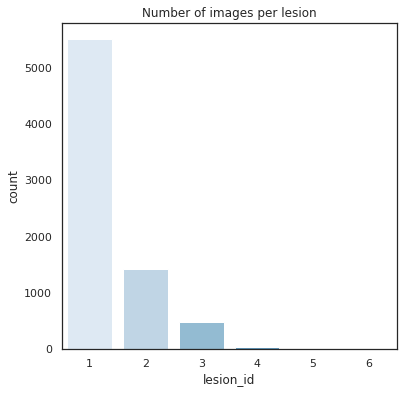

In [27]:
sns.set(style="white", palette="pastel", color_codes=True)
f, (ax1) = plt.subplots(1, 1, figsize=(6, 6))
sns.countplot(x=unique_lesion, palette="Blues", ax=ax1)
plt.title('Number of images per lesion')
plt.show()

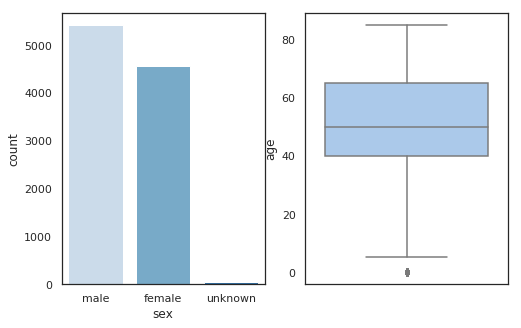

In [28]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
sns.countplot(x=labels['sex'], palette="Blues", ax=ax1)
sns.boxplot(x=labels['age'], orient='v', ax=ax2)
plt.show()

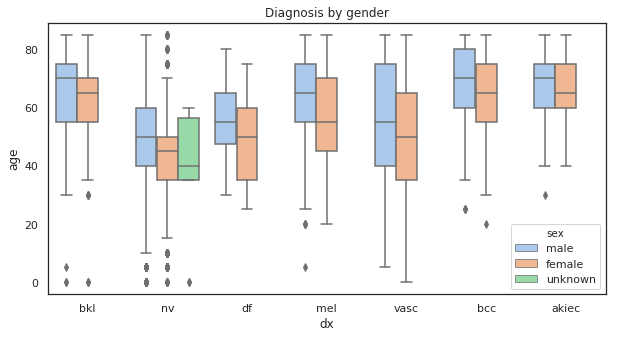

In [29]:
f, ax1 = plt.subplots(1,1, figsize=(10,5))
sns.boxplot(x=labels['dx'], y=labels['age'], hue=labels['sex'], ax=ax1)
plt.title('Diagnosis by gender')
plt.show()

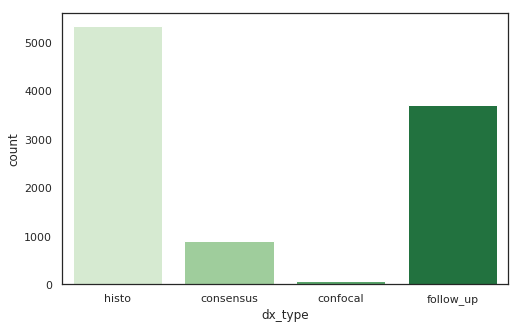

In [30]:
f, (ax1) = plt.subplots(1, 1, figsize=(8, 5), sharex=True)
sns.countplot(x=labels['dx_type'], palette="Greens", ax=ax1)
plt.show()

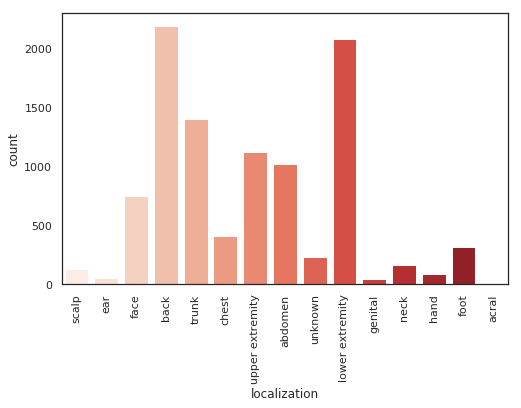

In [31]:
f, (ax1) = plt.subplots(1, 1, figsize=(8, 5), sharex=True)
sns.countplot(x=labels['localization'], palette="Reds", ax=ax1)
plt.xticks(rotation=90)
plt.show()

# Training

In [32]:
tfms = get_transforms(do_flip=True, 
                      flip_vert=True,
                      max_zoom=1.1,
                      max_warp=0.2, 
                      p_affine=0.5,
                      xtra_tfms=[rotate(degrees=(-45,45),p=.1),
                                brightness(change=(0.35,0.65),p=.5),
                                contrast(scale=(0.8,1.2),p=.5),
                                dihedral(p=1)])

In [33]:
np.random.seed(21)
data = ImageDataBunch.from_df(path='../input/', df=labels,
                              ds_tfms=tfms, size=224,bs=16,
                               valid_pct=0.2, fn_col='path', 
                              label_col='dx'
                              ).normalize(imagenet_stats)

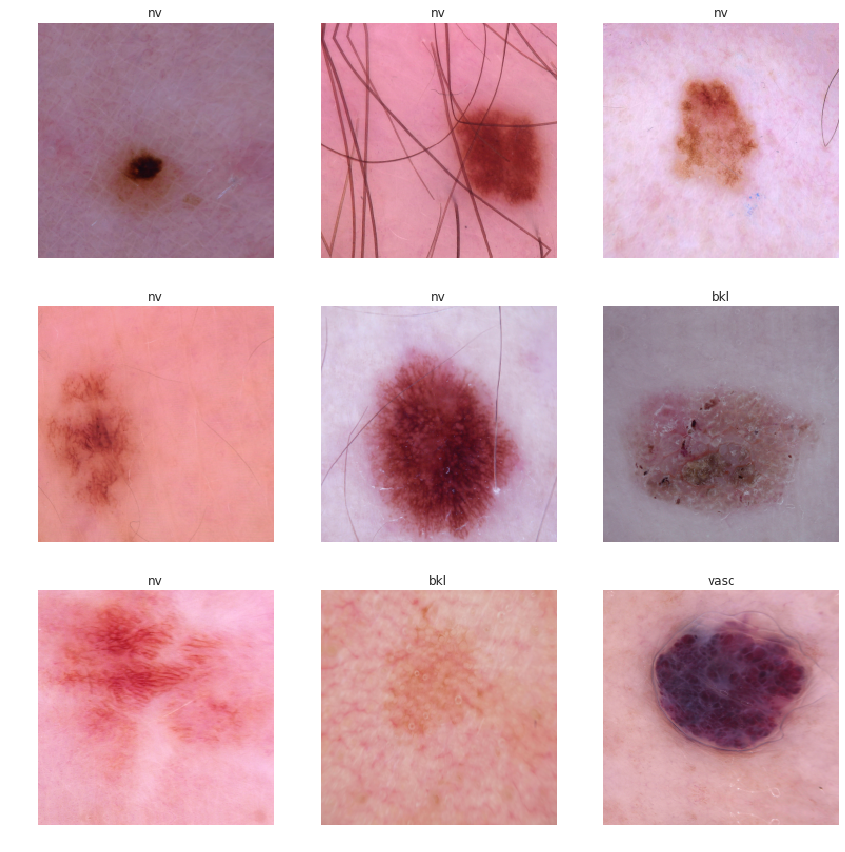

In [34]:
data.show_batch(rows=3)

In [41]:
learner201 = cnn_learner(data, models.densenet201, metrics=[error_rate, accuracy], model_dir="/tmp/model/")
# arch=densenet121
# learner = create_cnn
# (data, basearch=arch, metrics=[accuracy],ps=.5,model_dir="/tmp/model/",
#                     callback_fns=ShowGraph).to_fp16()

In [ ]:
learner201.lr_find()
learner201.recorder.plot()

epoch,train_loss,valid_loss,error_rate,accuracy,time


In [ ]:
learner210.fit(1, 1e-2)

In [ ]:
learner201.unfreeze()
learner201.lr_find()
learner201.recorder.plot()

In [ ]:
learner201.fit_one_cycle(3, max_lr=slice(1e-5, 1e-3), wd=0.1)

CLIPPING THE LEARNING RATE

# Prediction from Model

In [38]:
int.plot_top_losses(9, figsize=(10,10), heatmap=False)

AttributeError: type object 'int' has no attribute 'plot_top_losses'